---

# Predicting House Prices with Linear Regression

In this notebook, we will use linear regression to model the relationship between house features and their sale prices using the Ames Housing dataset. Linear regression assumes that the target variable (house price) can be expressed as a weighted linear combination of input features. This makes it a useful baseline model for understanding how variables like square footage, number of rooms, or building quality influence price.

Linear regression is easy to interpret, efficient to train, and provides a good starting point for evaluating feature importance. However, its assumptions of linearity, homoscedasticity, and independence can limit performance in the presence of nonlinear patterns or outliers. We will preprocess the data, select relevant numerical features, train a linear model using scikit-learn, and evaluate its predictive accuracy using common regression metrics.

The Ames Housing dataset contains information on residential homes in Ames, Iowa, including over 70 variables describing properties' physical and location characteristics. Our target variable is SalePrice, a continuous measure of house value.

---

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


---

Load in the data and remove missing entries.

---

In [8]:
# Load the data (from Kaggle or local CSV)
df = pd.read_csv("AmesHousing.csv")  # adjust path if needed
df = df.select_dtypes(include=[np.number])  # Only numeric features for now
df.dropna(inplace=True)  # Drop rows with missing values

df

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2924,923250060,20,80.0,17400,5,5,1977,1977,0.0,...,295,41,0,0,0,0,0,5,2006,160000
2924,2925,923251180,20,160.0,20000,5,7,1960,1996,0.0,...,474,0,0,0,0,0,0,9,2006,131000
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,...,120,0,0,0,0,0,0,3,2006,142500
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,...,240,38,0,0,0,0,0,4,2006,170000


---

Define our features and target.

---

In [9]:
target = 'SalePrice'
features = df.drop(columns=target).columns.tolist()

X = df[features]
y = df[target]

---

Split the space into training and test sets, then standardize the features.

---

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

Train the regressor on our preprocessed data:

---

In [11]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

---

Finally, test the model to see how it predicts! We'll print the R-squared value, the mean squared error, and the mean absolute error to start.

---

In [12]:
y_pred = model.predict(X_test_scaled)

print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

R² Score: 0.793
RMSE: 37384.81
MAE: 21969.66


---

Let's vizualize our model's predictions via graphing. We can see where the model would place a sales price after accounting for all features of a vector as compared to the actual value.

---

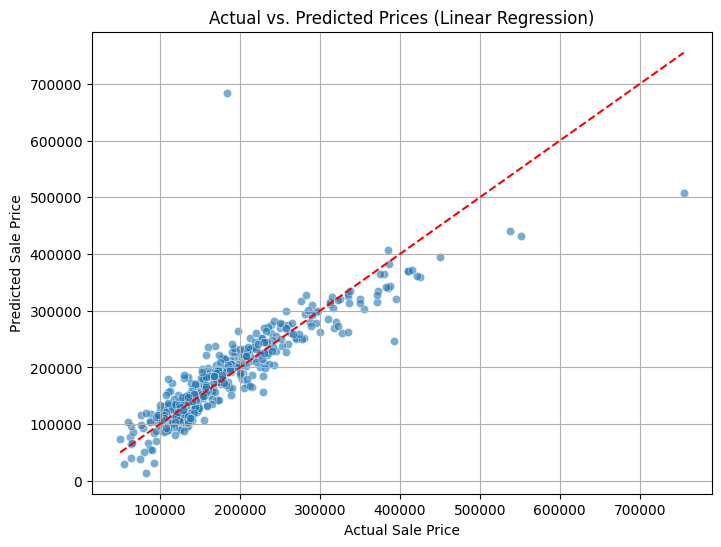

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.grid(True)
plt.show()

---

With linear regression, we can also do fun things like look at the relative importance of different features. Lets graph it now:

---

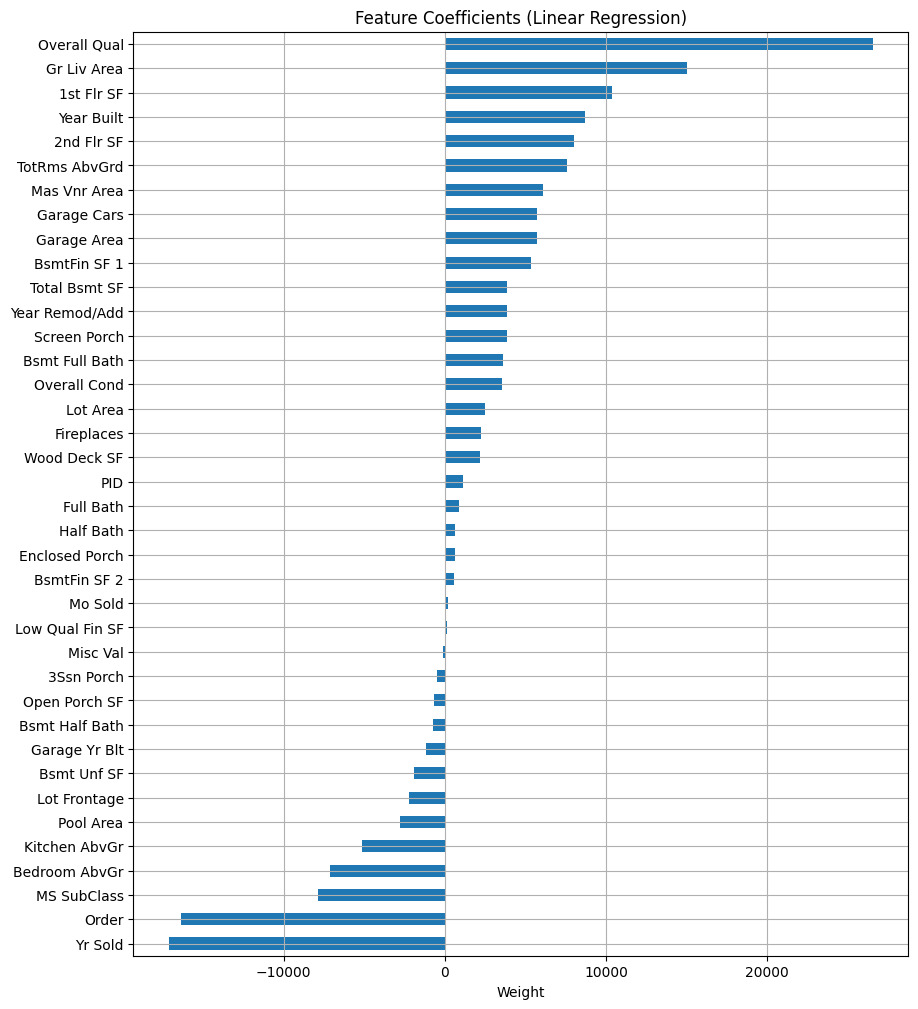

In [14]:
# Feature importance
coefs = pd.Series(model.coef_, index=X.columns)
coefs.sort_values().plot(kind='barh', figsize=(10, 12))
plt.title("Feature Coefficients (Linear Regression)")
plt.xlabel("Weight")
plt.grid()
plt.show()

---

As we can see, features like the area of sale matater far more than more tangential features like size of basement or garage age. We can use this information for various real-world applications; for instance, appraisers can use the weights identified by this regressor to more accurately model housing prices.

---